<a href="https://colab.research.google.com/github/hiimjupter/AIO24-KeepTrack/blob/feature%2Fexercise-M04/%5BAIO24%5D_M4W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [282]:
DATASET_PATH = '/content/drive/MyDrive/AIO24/M4W1/Dataset/advertising.csv'
df = pd.read_csv(DATASET_PATH)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [284]:
print(f"Total missing values: {df.isna().sum().sum()}")
print(f"Total duplicated rows: {df.duplicated().sum()}")

Total missing values: 0
Total duplicated rows: 0


In [285]:
def get_column(data, index):
  return [row[index] for row in data]

def prepare_data(dataset):
  data = np.genfromtxt(dataset, delimiter =',', skip_header=1).tolist()
  N = len(data)

  df_tv = get_column(data, 0)
  df_radio = get_column(data, 1)
  df_newspaper = get_column(data, 2)
  df_sales = get_column(data, 3)

  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(df_tv, df_radio, df_newspaper)]
  y = df_sales

  return X, y

X, y = prepare_data(DATASET_PATH)

In [286]:
def initialize_params():
  bias = 0
  w1 = random.gauss(mu=0, sigma=1)
  w2 = random.gauss(mu=0, sigma=1)
  w3 = random.gauss(mu=0, sigma=1)
  return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [287]:
def predict(X_features, weights):
  N = len(weights)
  y = 0
  for i in range(N):
    y += weights[i] * X_features[i]
  return y

In [288]:
def compute_loss_mse(y_hat, y):
  loss = (y_hat - y) ** 2
  return loss

In [289]:
def compute_loss_mae(y_hat, y):
  loss = abs(y_hat - y)
  return loss

In [290]:
def compute_gradient_wi(X_features, y_hat, y):
  dl_dweights = []
  for x in X_features:
    gradient_wi = 2 * (y_hat - y) * x
    dl_dweights.append(gradient_wi)
  return dl_dweights

def compute_gradient_b(y_hat, y):
  gradient_b = 2 * (y_hat - y)
  return gradient_b

In [291]:
def update_weight_wi(weights, dl_dweights, learning_rate):
  new_weights = []
  for wi, gradient_wi in zip(weights, dl_dweights):
    new_wi = wi - learning_rate * gradient_wi
    new_weights.append(new_wi)
  return new_weights

def update_weight_b(b, gradient_b, learning_rate):
  new_b = b - learning_rate * gradient_b
  return new_b

In [292]:
def implement_linear_regression_with_mse(X_data, y_data, learning_rate=1e-5, epochs=50):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)

  for epoch in range(epochs):
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss_mse(y_hat, y)

      gradient_w1 = compute_gradient_wi(x1, y_hat, y)
      gradient_w2 = compute_gradient_wi(x2, y_hat, y)
      gradient_w3 = compute_gradient_wi(x3, y_hat, y)
      gradient_b = compute_gradient_b(y_hat, y)

      w1 = update_weight_wi(w1, gradient_w1, learning_rate)
      w2 = update_weight_wi(w2, gradient_w2, learning_rate)
      w3 = update_weight_wi(w3, gradient_w3, learning_rate)
      b = update_weight_b(b, gradient_b, learning_rate)

      losses.append(loss)

  return (w1, w2, w3, b, losses)

In [293]:
def implement_linear_regression_with_mae(X_data, y_data, learning_rate=1e-5, epochs=50):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)

  for epoch in range(epochs):
    for i in range(N):
      x1 = X_data[0][i]
      x2 = X_data[1][i]
      x3 = X_data[2][i]

      y = y_data[i]

      y_hat = predict(x1, x2, x3, w1, w2, w3, b)

      loss = compute_loss_mae(y_hat, y)

      gradient_w1 = compute_gradient_wi(x1, y_hat, y)
      gradient_w2 = compute_gradient_wi(x2, y_hat, y)
      gradient_w3 = compute_gradient_wi(x3, y_hat, y)
      gradient_b = compute_gradient_b(y_hat, y)

      w1 = update_weight_wi(w1, gradient_w1, learning_rate)
      w2 = update_weight_wi(w2, gradient_w2, learning_rate)
      w3 = update_weight_wi(w3, gradient_w3, learning_rate)
      b = update_weight_b(b, gradient_b, learning_rate)

      losses.append(loss)

  return (w1, w2, w3, b, losses)

In [294]:
def implement_linear_regression_nsamples_with_mse(X_data, y_data, learning_rate=1e-5, epochs=1000):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)

  for epoch in range(epochs):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mse(y_hat, y)

            loss_total += loss

            gradient_w1 = compute_gradient_wi(x1, y_hat, y)
            gradient_w2 = compute_gradient_wi(x2, y_hat, y)
            gradient_w3 = compute_gradient_wi(x3, y_hat, y)
            gradient_b = compute_gradient_b(y_hat, y)

            dw1_total += gradient_w1
            dw2_total += gradient_w2
            dw3_total += gradient_w3
            db_total += gradient_b

        dw1_avg = dw1_total / N
        dw2_avg = dw2_total / N
        dw3_avg = dw3_total / N
        db_avg = db_total / N

        w1 = update_weight_wi(w1, dw1_avg, learning_rate)
        w2 = update_weight_wi(w2, dw2_avg, learning_rate)
        w3 = update_weight_wi(w3, dw3_avg, learning_rate)
        b = update_weight_b(b, db_avg, learning_rate)

        loss_avg = loss_total / N
        losses.append(loss_avg)

        if (epoch+1) % 100 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_avg}")

  return (w1, w2, w3, b, losses)

In [295]:
def implement_linear_regression_nsamples_with_mae(X_data, y_data, learning_rate=1e-5, epochs=1000):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)

  for epoch in range(epochs):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mae(y_hat, y)

            loss_total += loss

            gradient_w1 = compute_gradient_wi(x1, y_hat, y)
            gradient_w2 = compute_gradient_wi(x2, y_hat, y)
            gradient_w3 = compute_gradient_wi(x3, y_hat, y)
            gradient_b = compute_gradient_b(y_hat, y)

            dw1_total += gradient_w1
            dw2_total += gradient_w2
            dw3_total += gradient_w3
            db_total += gradient_b

        dw1_avg = dw1_total / N
        dw2_avg = dw2_total / N
        dw3_avg = dw3_total / N
        db_avg = db_total / N

        w1 = update_weight_wi(w1, dw1_avg, learning_rate)
        w2 = update_weight_wi(w2, dw2_avg, learning_rate)
        w3 = update_weight_wi(w3, dw3_avg, learning_rate)
        b = update_weight_b(b, db_avg, learning_rate)

        loss_avg = loss_total / N
        losses.append(loss_avg)

        if (epoch+1) % 100 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_avg}")

  return (w1, w2, w3, b, losses)

In [296]:
# (w1, w2, w3, b, losses) = implement_linear_regression_nsamples_with_mse(X, y)
# print(w1, w2, w3)
# plt.plot(losses)
# plt.xlabel("#Epoch")
# plt.ylabel("MSE Loss")
# plt.show()

Epoch 1/50:
Loss: 36.85343068725858
Epoch 2/50:
Loss: 35.84479944503251
Epoch 3/50:
Loss: 34.52215130331196
Epoch 4/50:
Loss: 33.887435843768564
Epoch 5/50:
Loss: 33.581599037876586
Epoch 6/50:
Loss: 33.42086370418345
Epoch 7/50:
Loss: 33.324007435615364
Epoch 8/50:
Loss: 33.25533609231918
Epoch 9/50:
Loss: 33.19913069165906
Epoch 10/50:
Loss: 33.14845973632828
Epoch 11/50:
Loss: 33.10026477297237
Epoch 12/50:
Loss: 33.05319589344298
Epoch 13/50:
Loss: 33.00665719372922
Epoch 14/50:
Loss: 32.96038558092477
Epoch 15/50:
Loss: 32.91426487366646
Epoch 16/50:
Loss: 32.868243743462294
Epoch 17/50:
Loss: 32.822299491039665
Epoch 18/50:
Loss: 32.77642205557136
Epoch 19/50:
Loss: 32.730606955547614
Epoch 20/50:
Loss: 32.68485217251222
Epoch 21/50:
Loss: 32.63915677537927
Epoch 22/50:
Loss: 32.593520313133716
Epoch 23/50:
Loss: 32.54794254673649
Epoch 24/50:
Loss: 32.502423330774334
Epoch 25/50:
Loss: 32.456962561212514
Epoch 26/50:
Loss: 32.411560152330516
Epoch 27/50:
Loss: 32.36621602654073


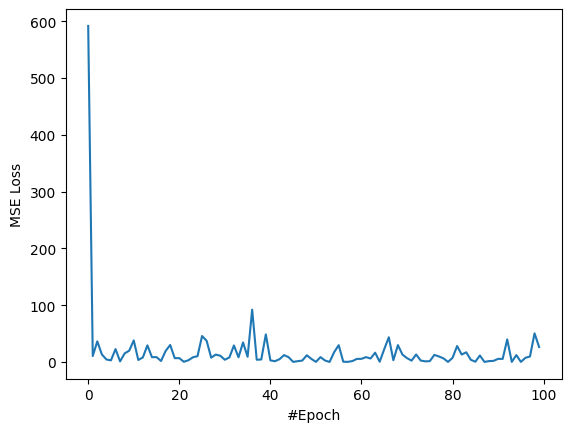

In [299]:
def implement_final_linear_regression(X_feature, y_output, epochs=50, lr=1e-5):
  losses = []

  weights = initialize_params()

  N = len(y_output)

  for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}:")
    for i in range(N):
      features_i = X_feature[i]
      y = y_output[i]

      y_hat = predict(features_i, weights)

      loss = compute_loss_mse(y_hat, y)

      dl_dweights = compute_gradient_wi(features_i, y_hat, y)

      weights = update_weight_wi(weights, dl_dweights, lr)

      losses.append(loss)

    print(f"Loss: {loss}")

  return weights, losses

X, y = prepare_data(DATASET_PATH)
W, L = implement_final_linear_regression(X, y)
plt.plot(L[:100])
plt.xlabel("#Epoch")
plt.ylabel("MSE Loss")
plt.show()

In [300]:
print(L[9999])

31.339223408109948
